# **FACE MASK DETECTION USING CNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x "/content/drive/My Drive/dataset.rar" "/content/drive/MyDrive/Colab Notebooks/Imagedataset"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/dataset.rar


Would you like to replace the existing file /content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset/without_mask/0.jpg
 21764 bytes, modified on 2020-07-09 12:42
with a new one
 21764 bytes, modified on 2020-07-09 12:42

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset/without_mask/0.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset/without_mask/0_0_aidai_0014.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset/without_mask/0_0_aidai_0029.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset/without_mask/0_0_aidai_0043.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset/without_mask/0_0_aidai_0074.jpg     

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [ ]:
import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already thier in tensorflow
from tensorflow.keras.models import Sequential    #To create the sequential layer
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  #To create the model
from tensorflow.keras.optimizers import Adam      #Adam optimizer
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files 

In [ ]:
uploaded = files.upload()

In [ ]:
!unzip dataset.zip
!rm dataset.zip

unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.
rm: cannot remove 'dataset.zip': No such file or directory


In [ ]:
batch_size = 8
epochs = 20

In [ ]:


train_datagen = ImageDataGenerator(validation_split=0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                DIRECTORY,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                shuffle= True,
                                seed=2020,                      # to make the result reproducible
                                subset = 'training')

Found 3553 images belonging to 2 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
                                DIRECTORY,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                shuffle= True,
                                seed=2020,                      # to make the result reproducible
                                subset = 'training')

Found 3553 images belonging to 2 classes.


""**Display a batch of the images used in the training and thier labels**""

In [ ]:
#generate a batch of images and labels from the training set
imgs, labels = next(train_generator)

###Plotting function

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

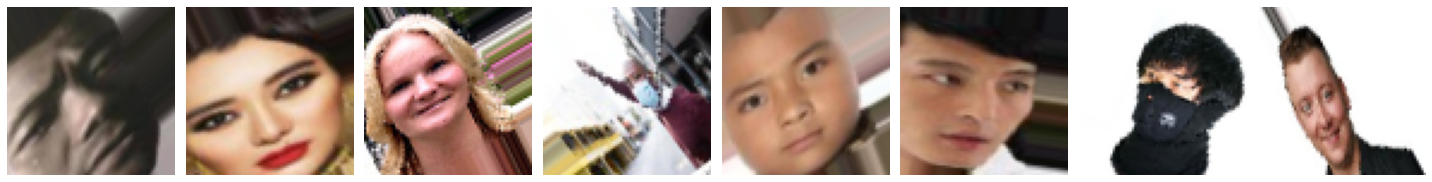

[1. 1. 1. 0. 1. 1. 0. 1.]


In [ ]:
plotImages(imgs);
print(labels);

## Build and train the CNN

In [ ]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator ,epochs = epochs,validation_data= valid_generator)

Epoch 1/20
282/445 [==================>...........] - ETA: 50s - loss: 0.6202 - accuracy: 0.6520

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


445/445 [==============================] - 170s 381ms/step - loss: 0.5713 - accuracy: 0.6924 - val_loss: 0.3616 - val_accuracy: 0.8607
Epoch 2/20
445/445 [==============================] - 68s 153ms/step - loss: 0.3385 - accuracy: 0.8694 - val_loss: 0.3070 - val_accuracy: 0.8849
Epoch 3/20
445/445 [==============================] - 71s 159ms/step - loss: 0.3048 - accuracy: 0.8794 - val_loss: 0.2933 - val_accuracy: 0.8840
Epoch 4/20
445/445 [==============================] - 71s 159ms/step - loss: 0.2749 - accuracy: 0.8938 - val_loss: 0.2675 - val_accuracy: 0.8987
Epoch 5/20
445/445 [==============================] - 72s 161ms/step - loss: 0.2677 - accuracy: 0.8941 - val_loss: 0.2706 - val_accuracy: 0.8947
Epoch 6/20
445/445 [==============================] - 71s 159ms/step - loss: 0.2618 - accuracy: 0.8975 - val_loss: 0.2556 - val_accuracy: 0.9001
Epoch 7/20
445/445 [==============================] - 71s 159ms/step - loss: 0.2504 - accuracy: 0.8980 - val_loss: 0.2594 - val_accuracy: 0.

***Plotting the loss of validation and training***

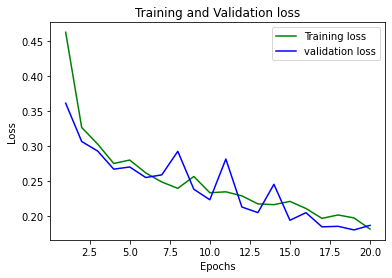

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

***Plotting the accuracy of validation and training***

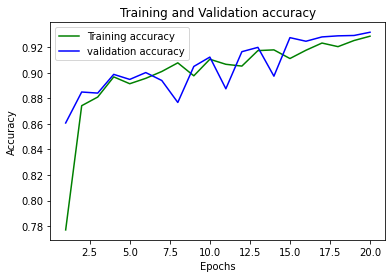

In [ ]:
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **FACE MASK DETECTION USING MOBILEV2**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
INIT_LR = 1e-4
EPOCHS = 5
BS = 32

DIRECTORY = r"/content/drive/MyDrive/Colab Notebooks/Imagedataset/dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [ ]:
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

[INFO] loading images...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [ ]:
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/5
136/136 [==============================] - 211s 2s/step - loss: 0.5003 - accuracy: 0.7704 - val_loss: 0.1043 - val_accuracy: 0.9845
Epoch 2/5
136/136 [==============================] - 208s 2s/step - loss: 0.1186 - accuracy: 0.9674 - val_loss: 0.0619 - val_accuracy: 0.9881
Epoch 3/5
136/136 [==============================] - 210s 2s/step - loss: 0.0760 - accuracy: 0.9843 - val_loss: 0.0495 - val_accuracy: 0.9881
Epoch 4/5
136/136 [==============================] - 208s 2s/step - loss: 0.0598 - accuracy: 0.9839 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoch 5/5
136/136 [==============================] - 211s 2s/step - loss: 0.0501 - accuracy: 0.9885 - val_loss: 0.0372 - val_accuracy: 0.9881


In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...


In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       712
without_mask       0.99      0.97      0.98       384

    accuracy                           0.99      1096
   macro avg       0.99      0.98      0.99      1096
weighted avg       0.99      0.99      0.99      1096



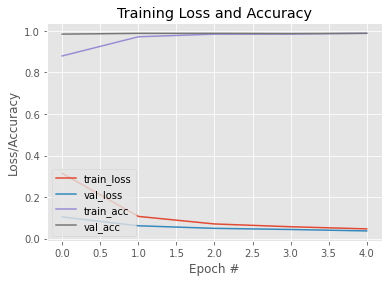

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")